## SVM

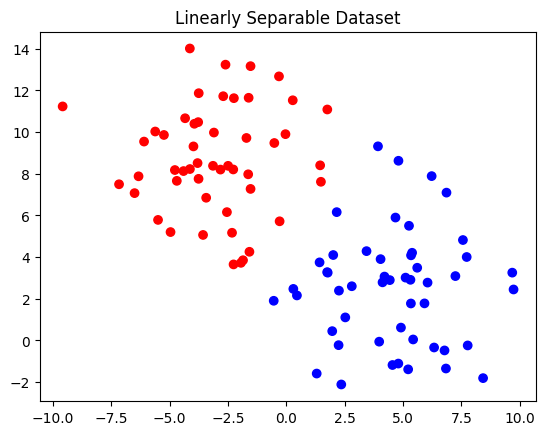

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

'''
    use make_blobs() function to create a linear separable dataset
    modify the para cluster_std to change the variance of points
'''
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=2.7)
colors = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)
plt.title("Linearly Separable Dataset")
plt.show()


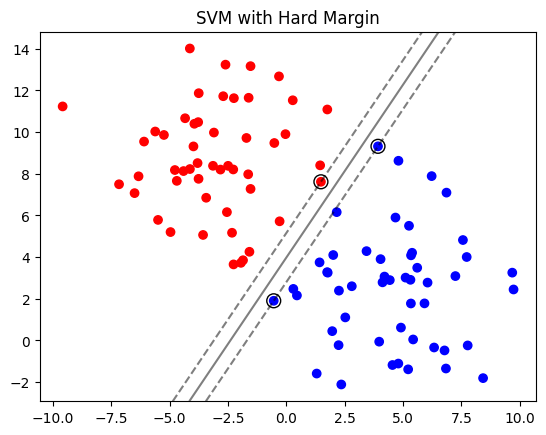

In [2]:
from sklearn import svm

# Hard margin: use big values of C
clf_hard_margin = svm.SVC(kernel='linear', C=1e6)
clf_hard_margin.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_hard_margin.decision_function(xy).reshape(XX.shape)

# Draw boundaries
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Draw Support vector
ax.scatter(clf_hard_margin.support_vectors_[:, 0], clf_hard_margin.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("SVM with Hard Margin")
plt.show()


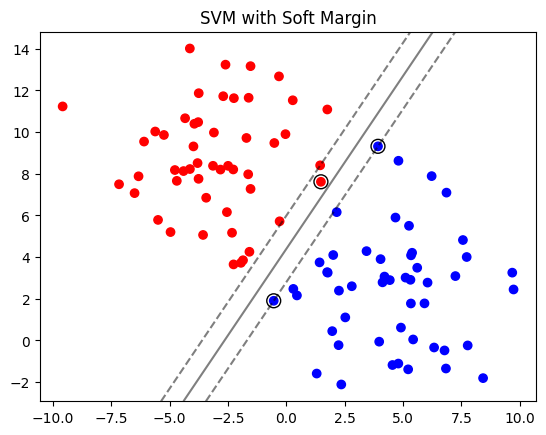

In [3]:
# Soft margin
clf_soft_margin = svm.SVC(kernel='linear', C=1.0)
clf_soft_margin.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_soft_margin.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf_soft_margin.support_vectors_[:, 0], clf_soft_margin.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("SVM with Soft Margin")
plt.show()


In [4]:
''' 
    Conclusion: 
    -  As we can see, the margin size in Soft Margin SVM is larger than in Hard Margin SVM!
'''

' \n    Conclusion: \n    -  As we can see, the margin size in Soft Margin SVM is larger than in Hard Margin SVM!\n'

### Tạo bộ dữ liệu phi tuyến

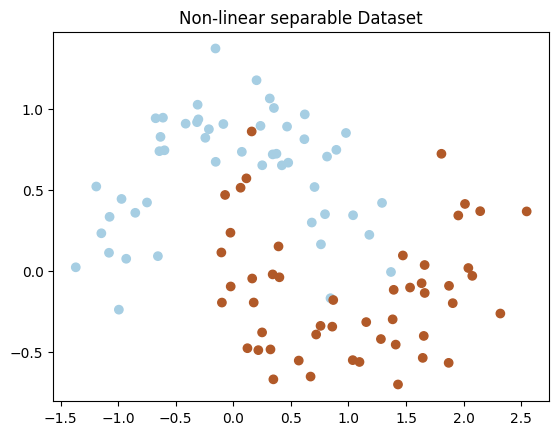

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

'''
    make_moon create a non-linear separable dataset
'''
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Non-linear separable Dataset")
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = 1.0 

def plot_svm_decision_boundary(clf, X, y, ax):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

def print_results(clf, X, y):
    predictions = clf.predict(X)
    correct = np.sum(predictions == y)
    incorrect = np.sum(predictions != y)
    print('Kernel:' ,clf.kernel)
    print('Correct:', correct)
    print('Incorrect:' ,incorrect)
    print('')




Kernel: linear
Correct: 87
Incorrect: 13

Kernel: poly
Correct: 89
Incorrect: 11

Kernel: rbf
Correct: 94
Incorrect: 6

Kernel: sigmoid
Correct: 66
Incorrect: 34



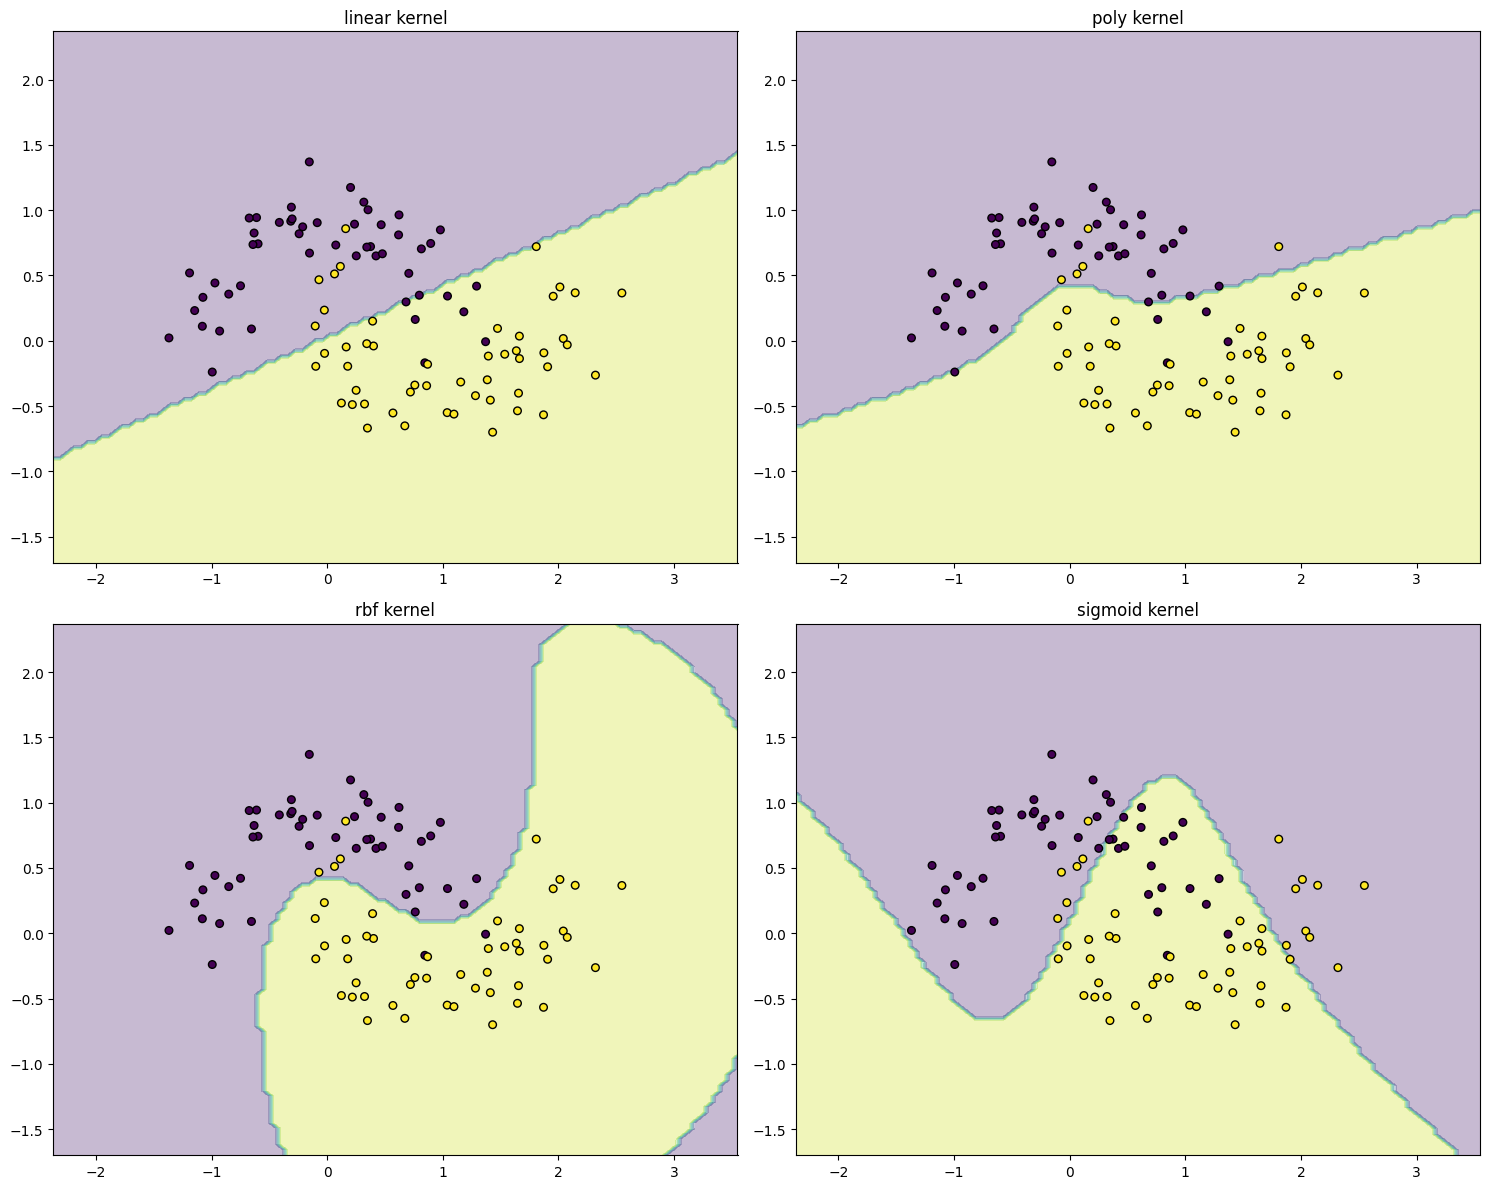

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for kernel, ax in zip(kernels, axes.ravel()):
    clf = SVC(kernel=kernel, C=C)
    clf.fit(X, y)
    plot_svm_decision_boundary(clf, X, y, ax)
    ax.set_title(f'{kernel} kernel')
    print_results(clf, X, y)

plt.tight_layout()
plt.show()